In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [95]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
train.describe()
train.fillna(train.mean(),inplace=True)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
test.describe()
test.fillna(test.mean(),inplace=True)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [98]:
train['Ticket'].head(),train['Cabin'].head()

(0           A/5 21171
 1            PC 17599
 2    STON/O2. 3101282
 3              113803
 4              373450
 Name: Ticket, dtype: object, 0     NaN
 1     C85
 2     NaN
 3    C123
 4     NaN
 Name: Cabin, dtype: object)

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


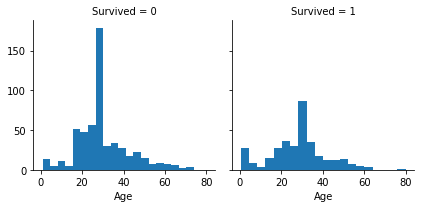

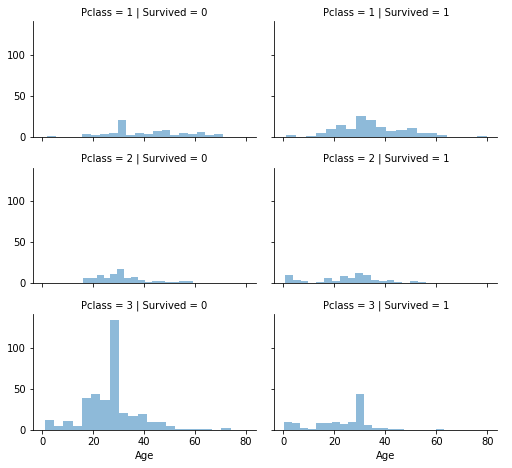

In [24]:
#Pclass, Survived
#Groupby
data_temp=train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
data_temp
#Sex, Survived
data_temp2=train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
data_temp2
#sibsp: 함께 탑승한 형제 또는 배우자 수
data_temp3=train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()
data_temp3

g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)
grid=sns.FacetGrid(train, col='Survived',row='Pclass',size=2.2, aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5, bins=20)
grid.add_legend()

In [99]:
train.info()
train=train.drop(['Name','Ticket','Cabin','Embarked'],axis=1)
test=test.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
labelSex=LabelEncoder()
labelSex.fit(train['Sex'])
labelSex.fit(test['Sex'])
train['Sex']=labelSex.transform(train['Sex'])
test['Sex']=labelSex.transform(test['Sex'])

In [101]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


In [93]:
#train=train.drop(['Survived'],axis=1)

In [117]:
x=np.array(train.drop(['Survived'],axis=1)).astype(float)

In [103]:
y=np.array(train['Survived'])

In [118]:
x.shape, y.shape

((891, 7), (891,))

In [119]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
correct=0
for i in range(len(x)):
    predict_m=np.array(x[i].astype(float))
    predict_m=predict_m.reshape(-1,len(predict_m))
    prediction=kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

In [121]:
print(correct/len(x))

0.49158249158249157


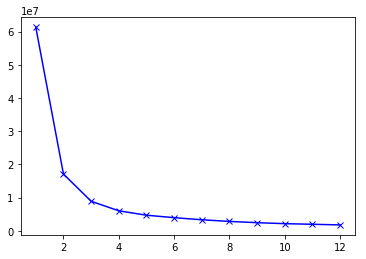

In [122]:
data10=[]
K=range(1,13)
for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(x)
    data10.append(kmeanModel.inertia_)
plt.plot(K, data10, 'bx-')

In [123]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [124]:
x_scaled.shape

(891, 7)

In [129]:
correct=0
for i in range(len(x_scaled)):
    predict_m=np.array(x_scaled[i].astype(float))
    predict_m=predict_m.reshape(-1,len(predict_m))
    prediction=kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1

In [132]:
print(correct/len(x))

0.6161616161616161
